In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def f(x):
    return np.sin(x)**2
def df(x):
    return 2*np.cos(x)*np.sin(x)

In [3]:
#copy and paste
#Hermite
def hdiff(x, y, yprime):
    m = x.size 
    l = 2*m
    z = np.zeros(l)
    a = np.zeros(l)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    for i in range(m):
        a[2*i] = y[i]
        a[2*i+1] = y[i]
    for i in np.flip(np.arange(1, m)): 
       a[2*i+1] = yprime[i]
       a[2*i] = (a[2*i]-a[2*i-1]) / (z[2*i]-z[2*i-1])
    a[1] = yprime[0]
    for j in range(2, l):
        for i in np.flip(np.arange(j, l)):
            a[i]=(a[i]-a[i-1]) / (z[i]-z[i-j])
    return a
    
def hermite(x, y, yprime, w):
    m = x.size 
    a = hdiff(x, y, yprime)
    z = np.zeros(2*m)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    sum = a[0]
    pr = 1.0
    for j in range(2*m-1):
        pr *= w-z[j]
        sum += a[j+1]*pr
    return sum    

In [4]:
xdata = np.linspace(0,2*np.pi, 5) #5 is the number of intervals that I chose.
x = np.linspace(0,2*np.pi, 100)
y = f(xdata)
fun=f(x)
yprime = df(xdata)
Hinterp = hermite(xdata, y, yprime, x)

In [5]:
#Lagrange
from scipy.interpolate import lagrange
lagrangee= lagrange(xdata,y)

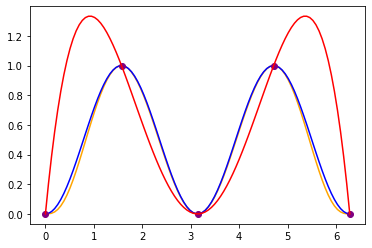

In [6]:
plt.plot( x, Hinterp, color="orange")#hermite
plt.plot( x, fun, color="blue")#real fuction
plt.plot( xdata, y, "o", color="purple")#data
plt.plot( x, lagrangee(x), color="red")#lagrange

**Answer:**

Hermite interpolation (the orange one) fits the real function (blue one) better than Lagrange (red one). But we notice that each interpolation passes through the data (purple dots).